In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix,  recall_score, precision_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import NearMiss
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\RainForecast\weatherAUS.csv')
#https://www.kaggle.com/jsphyg/weather-dataset-rattle-package


In [3]:
print(df.RainTomorrow.unique())
print(df.RainToday.unique())

['No' 'Yes' nan]
['No' 'Yes' nan]


In [4]:
#df[df['RainTomorrow'].isnull()]
df = df[df['RainTomorrow'].notnull()]
df = df[df['RainToday'].notnull()]

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Cleaning

In [6]:
df.shape

(140787, 23)

In [7]:
df['Date']= pd.to_datetime(df['Date'])

df.drop(df[['Evaporation','Sunshine','Cloud9am','Cloud3pm']],axis = 1, inplace = True)

In [8]:
df.isnull().sum(axis = 0)

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

In [9]:
df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [10]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


<AxesSubplot:>

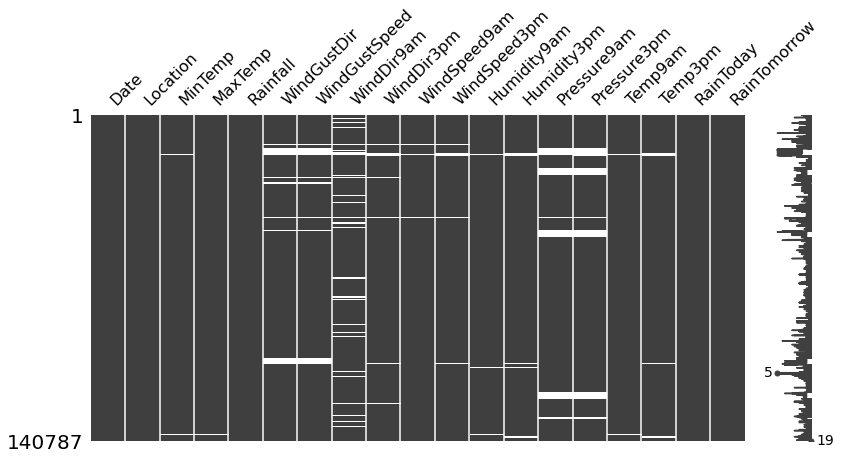

In [12]:
msno.matrix(df,figsize = [13,6])

# Exploratory Data Analysis

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

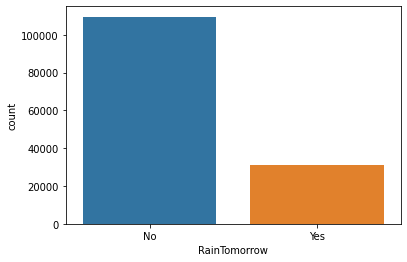

In [13]:
sns.countplot(x='RainTomorrow',data=df)

In [14]:
#sns.scatterplot(x='Sunshine',hue='RainToday',y='Rainfall',data=df)

In [15]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

# Pre-Processing

In [16]:
le = preprocessing.LabelEncoder()

df['Location'] = le.fit_transform(df['Location'])
df['WindGustDir']= le.fit_transform(df['WindGustDir'])
df['WindDir9am']= le.fit_transform(df['WindDir9am'])
df['WindDir3pm']= le.fit_transform(df['WindDir3pm'])
df['RainToday']= le.fit_transform(df['RainToday'])
df['RainTomorrow']= le.fit_transform(df['RainTomorrow'])
#df[['RainTomorrow']].boxplot()

In [17]:
df.RainTomorrow.unique()

array([0, 1])

In [18]:
df = df.groupby("Location").transform(lambda x: x.fillna(x.mean()))

C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [19]:
df = df.fillna(df.mean())

C:\Users\PRM\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

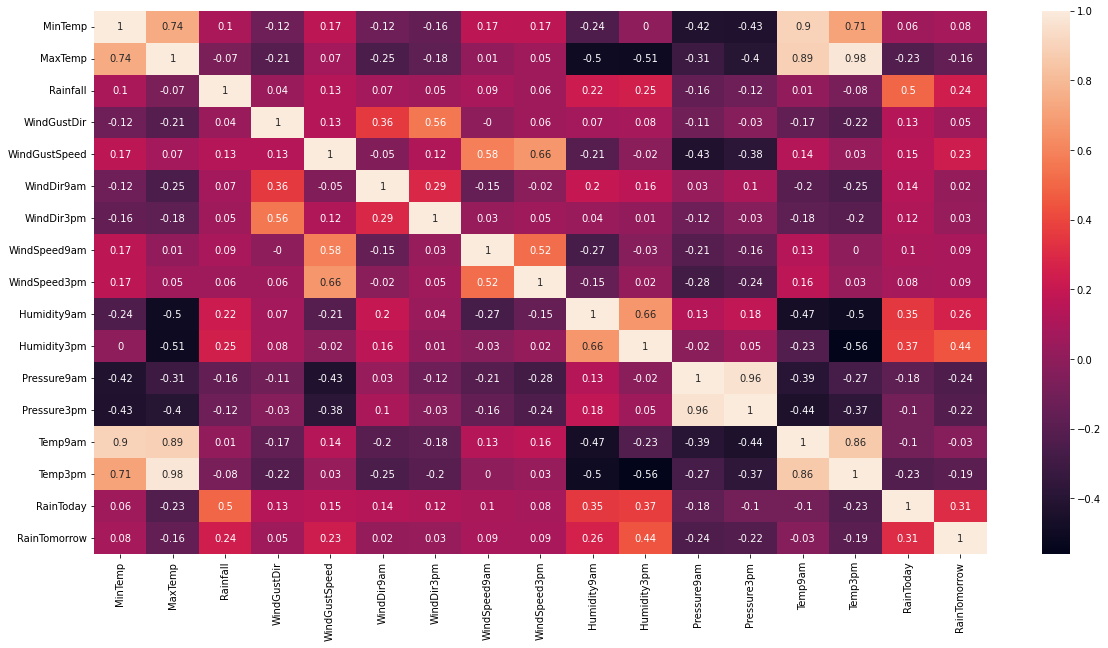

In [20]:
rcParams['figure.figsize'] = 20,10
sns.heatmap(round(df.corr(),2),annot=True)

In [50]:
y =  df['RainTomorrow']
X = df[['MinTemp','MaxTemp','RainToday','Rainfall','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
        'WindGustSpeed','WindSpeed9am','WindSpeed3pm']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [22]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'], dtype='object')>

# Logistic Regression

In [23]:
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.375356
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                98550
Model:                          Logit   Df Residuals:                    98539
Method:                           MLE   Df Model:                           10
Date:                Wed, 01 Dec 2021   Pseudo R-squ.:                  0.2918
Time:                        23:47:42   Log-Likelihood:                -36991.
converged:                       True   LL-Null:                       -52233.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
MinTemp           0.0288      0.003      8.782      0.000       0.022       0.035
MaxTemp          -0.

In [24]:
y_pred = model.predict(X_test)
y_pred = list(map(round, y_pred))

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred,labels=[1,0])

print(confusion_matrix)
print('AIC: ',model.aic)
print('BIC: ',model.bic)
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print('Pseudo R-squared: ',str(round(model.prsquared*100,2)),'%')
print(classification_report(y_test, y_pred))


[[ 4289  4988]
 [ 1623 31337]]
AIC:  74004.61274806892
BIC:  74109.0942605073
Accuracy: 84.35 %
Pseudo R-squared:  29.18 %
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32960
           1       0.73      0.46      0.56      9277

    accuracy                           0.84     42237
   macro avg       0.79      0.71      0.73     42237
weighted avg       0.83      0.84      0.83     42237



# K Nearest Neighbor (n=4)

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 4,metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

In [27]:
y_pred  =  classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print(classification_report(y_test, y_pred))

[[31521  1439]
 [ 5549  3728]]
Accuracy: 83.46 %
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     32960
           1       0.72      0.40      0.52      9277

    accuracy                           0.83     42237
   macro avg       0.79      0.68      0.71     42237
weighted avg       0.82      0.83      0.82     42237



# K Nearest Neighbor (n=5)

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [30]:
y_pred  =  classifier.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print(classification_report(y_test, y_pred))

[[30646  2314]
 [ 4708  4569]]
Accuracy: 83.37 %
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     32960
           1       0.66      0.49      0.57      9277

    accuracy                           0.83     42237
   macro avg       0.77      0.71      0.73     42237
weighted avg       0.82      0.83      0.82     42237



# Random Forest

In [74]:
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [77]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[31147  1657]
 [ 4761  4672]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     32804
           1       0.74      0.50      0.59      9433

    accuracy                           0.85     42237
   macro avg       0.80      0.72      0.75     42237
weighted avg       0.84      0.85      0.84     42237



=== All AUC Scores ===
[0.85977219 0.78039354 0.83563325 0.83257811 0.85918483 0.86553069
 0.85388118 0.88800937 0.83883454 0.8886866 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8502504314872524


# Naive Bayes

In [78]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [79]:
y_pred  =  classifier.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print(classification_report(y_test, y_pred))

[[29509  3295]
 [ 4706  4727]]
Accuracy: 81.06 %
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     32804
           1       0.59      0.50      0.54      9433

    accuracy                           0.81     42237
   macro avg       0.73      0.70      0.71     42237
weighted avg       0.80      0.81      0.80     42237



# SMOTE

In [64]:
y =  df['RainTomorrow']
X = df[['MinTemp','MaxTemp','RainToday','Rainfall','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
        'WindGustSpeed','WindSpeed9am','WindSpeed3pm']]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)


smt = SMOTE()
x_smote, y_smote = smt.fit_resample(X_train, y_train)

In [65]:
sc = StandardScaler()

In [66]:
x_smote = sc.fit_transform(x_smote)
x_smote_test = sc.transform(X_test)

In [67]:
logisticregression = LogisticRegression()
logisticregression.fit(x_smote,y_smote)

LogisticRegression()

In [68]:
y_pred = logisticregression.predict(x_smote_test)

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print(classification_report(y_test, y_pred))

[[25765  7039]
 [ 2275  7158]]
Accuracy: 77.95 %
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     32804
           1       0.50      0.76      0.61      9433

    accuracy                           0.78     42237
   macro avg       0.71      0.77      0.73     42237
weighted avg       0.83      0.78      0.79     42237



# NearMiss

In [70]:
nr = NearMiss()
x_nearmiss, y_nearmiss = nr.fit_resample(X_train, y_train)

In [71]:
x_nearmiss = sc.fit_transform(x_nearmiss)
x_nearmiss_test= sc.transform(X_test)

In [72]:
logisticregression = LogisticRegression()
logisticregression.fit(x_nearmiss,y_nearmiss)

LogisticRegression()

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
print('Accuracy:',round(metrics.accuracy_score(y_test, y_pred)*100,2),'%')
print(classification_report(y_test, y_pred))

[[25765  7039]
 [ 2275  7158]]
Accuracy: 77.95 %
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     32804
           1       0.50      0.76      0.61      9433

    accuracy                           0.78     42237
   macro avg       0.71      0.77      0.73     42237
weighted avg       0.83      0.78      0.79     42237

